In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [84]:
#Project on Violent crimes in cincinnati and predicting it.

In [85]:
#Let us analyze the household income level of cincinnati from 2013 to 2019.
#Because poverty is one of the reasons for crimes

In [80]:
income = pd.read_csv('D:\python\Python_project\Datasets\Income by location.csv')

In [83]:
#Data had values only till the eyar 2017 , did forecasting to add values for 2018 and 2019

In [81]:
income

ID Year  Year  ID Race   Race  Household Income by Race  \
0       2013  2013        0  Total                 36412.000   
1       2013  2013        0  Total                 18852.000   
2       2013  2013        0  Total                 12799.000   
3       2013  2013        0  Total                 20164.000   
4       2013  2013        0  Total                 23157.000   
..       ...   ...      ...    ...                       ...   
834     2019  2019        0  Total                 20653.548   
835     2019  2019        0  Total                 33369.522   
836     2019  2019        0  Total                 29865.000   
837     2019  2019        0  Total                 39639.000   
838     2019  2019        0  Total                 31706.856   

     Household Income by Race Moe                              Geography  \
0                        5673.000  Census Tract 108, Hamilton County, OH   
1                        4267.000   Census Tract 94, Hamilton County, OH   
2                        2927.000   Census Tract 36, Hamilton County, OH   
3                        5162.000   Census Tract 77, Hamilton County, OH   
4                        5524.000   Census Tract 29, Hamilton County, OH   
..                            ...                                    ...   
834                      6322.692   Census Tract 71, Hamilton County, OH   
835                      8701.032   Census Tract 75, Hamilton County, OH   
836                      9047.466   Census Tract 72, Hamilton County, OH   
837                     21133.560   Census Tract 74, Hamilton County, OH   
838                      8748.816   Census Tract 73, Hamilton County, OH   

           ID Geography  
0    14000US39061010800  
1    14000US39061009400  
2    14000US39061003600  
3    14000US39061007700  
4    14000US39061002900  
..                  ...  
834  14000US39061007100  
835  14000US39061007500  
836  14000US39061007200  
837  14000US39061007400  
838  14000US39061007300  

[839 rows x 8 columns]

In [102]:
income_by_year = income.groupby('Year',as_index=False).agg({'Household Income by Race Moe':'mean'})

In [104]:
income_by_year

Year  Household Income by Race Moe
0  2013                   8644.350000
1  2014                   8300.466667
2  2015                   7836.425000
3  2016                   8713.386555
4  2017                   9341.733333
5  2018                   8964.190950
6  2019                   9387.764100

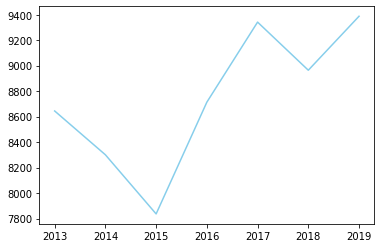

In [106]:
plt.plot('Year','Household Income by Race Moe',data=income_by_year,color='skyblue')
plt.show()

In [9]:
crimes = pd.read_csv('D:\python\Python_project\Datasets\Crime.csv')

longitude_x  latitude_x      zip
0        -84.489138   39.126512  45206.0
1        -84.488474   39.129501  45206.0
2        -84.573068   39.192750  45239.0
3        -84.553651   39.207029  45224.0
4        -84.475713   39.140473  45207.0
...             ...         ...      ...
147093   -84.514099   39.111243  45202.0
147094   -84.503752   39.136645  45229.0
147095   -84.581609   39.115022  45205.0
147096   -84.514425   39.112050  45202.0
147097   -84.486114   39.127156  45206.0

[147098 rows x 3 columns]

In [11]:
crimes.columns

Index(['INSTANCEID', 'INCIDENT_NO', 'DATE_REPORTED', 'DATE_FROM', 'DATE_TO',
       'CLSD', 'UCR', 'DST', 'BEAT', 'OFFENSE', 'LOCATION', 'THEFT_CODE',
       'FLOOR', 'SIDE', 'OPENING', 'HATE_BIAS', 'DAYOFWEEK', 'RPT_AREA',
       'CPD_NEIGHBORHOOD', 'SNA_NEIGHBORHOOD', 'WEAPONS', 'DATE_OF_CLEARANCE',
       'HOUR_FROM', 'HOUR_TO', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X',
       'VICTIM_AGE', 'VICTIM_RACE', 'VICTIM_ETHNICITY', 'VICTIM_GENDER',
       'SUSPECT_AGE', 'SUSPECT_RACE', 'SUSPECT_ETHNICITY', 'SUSPECT_GENDER',
       'TOTALNUMBERVICTIMS', 'TOTALSUSPECTS', 'UCR_GROUP',
       'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'ZIP'],
      dtype='object')

In [12]:
crimes=crimes.drop(['INSTANCEID','COMMUNITY_COUNCIL_NEIGHBORHOOD','FLOOR','SIDE','OPENING','CLSD', 'UCR', 'DST', 'BEAT','RPT_AREA','UCR_GROUP','THEFT_CODE','HATE_BIAS','VICTIM_ETHNICITY','SUSPECT_ETHNICITY'],axis=1)

In [16]:
crimes = crimes.dropna().reset_index(drop=True)

In [17]:
crimes.head()

INCIDENT_NO           DATE_REPORTED               DATE_FROM  \
0   129036747  12/18/2012 10:30:00 PM  12/18/2012 10:24:00 PM   
1   149026722  10/20/2014 11:09:00 AM  10/19/2014 10:00:00 PM   
2   179011319  04/03/2017 08:50:00 PM  04/03/2017 05:00:00 PM   
3   139026892  09/29/2013 10:46:00 PM  09/29/2013 08:00:00 PM   
4   139014514  06/07/2013 08:33:00 PM  06/07/2013 08:20:00 PM   

                  DATE_TO               OFFENSE               LOCATION  \
0  12/18/2012 10:25:00 PM    AGGRAVATED ROBBERY              47-STREET   
1  10/20/2014 10:30:00 AM                 THEFT         48-PARKING LOT   
2  04/03/2017 05:10:00 PM    AGGRAVATED ROBBERY         48-PARKING LOT   
3  09/29/2013 09:00:00 PM  MENACING BY STALKING  01-SINGLE FAMILY HOME   
4  06/07/2013 08:30:00 PM               ASSAULT              47-STREET   

  DAYOFWEEK CPD_NEIGHBORHOOD SNA_NEIGHBORHOOD  \
0   TUESDAY     WALNUT HILLS     WALNUT HILLS   
1    SUNDAY     WALNUT HILLS     WALNUT HILLS   
2    MONDAY       MOUNT AIRY         MT. AIRY   
3    SUNDAY    COLLEGE  HILL     COLLEGE HILL   
4    FRIDAY         EVANSTON         EVANSTON   

                                            WEAPONS  ... LATITUDE_X  \
0                                      12 - HANDGUN  ...  39.126512   
1                                         99 - NONE  ...  39.129501   
2                                      12 - HANDGUN  ...  39.192750   
3  40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...  39.207029   
4                                         99 - NONE  ...  39.140473   

   VICTIM_AGE  VICTIM_RACE VICTIM_GENDER  SUSPECT_AGE  SUSPECT_RACE  \
0       41-50        BLACK          MALE      UNKNOWN         BLACK   
1       31-40        BLACK        FEMALE        31-40         WHITE   
2    UNDER 18        BLACK          MALE     UNDER 18         BLACK   
3       31-40        BLACK          MALE        26-30         BLACK   
4       26-30        BLACK        FEMALE        18-25         BLACK   

  SUSPECT_GENDER TOTALNUMBERVICTIMS TOTALSUSPECTS      ZIP  
0           MALE                1.0           3.0  45206.0  
1           MALE                1.0           2.0  45206.0  
2           MALE                2.0           2.0  45239.0  
3         FEMALE                2.0           1.0  45224.0  
4         FEMALE                3.0           4.0  45207.0  

[5 rows x 25 columns]

In [35]:
crimes.offense.unique()

array(['AGGRAVATED ROBBERY', 'THEFT', 'MENACING BY STALKING', 'ASSAULT',
       'TELEPHONE HARASSMENT', 'AGGRAVATED MENACING', 'ROBBERY',
       'FELONIOUS ASSAULT', 'DOMESTIC VIOLENCE', 'AGGRAVATED BURGLARY',
       'CRIMINAL DAMAGING/ENDANGERING', 'MENACING',
       'BREAKING AND ENTERING', 'ABDUCTION',
       'VIOLATE PROTECTION ORDER/CONSENT AGREEMENT', 'PASSING BAD CHECKS',
       'AGGRAVATED ASSAULT', 'BURGLARY', 'GROSS SEXUAL IMPOSITION',
       'ENDANGERING CHILDREN', 'UNAUTHORIZED USE OF MOTOR VEHICLE',
       'UNLAWFUL RESTRAINT', 'SEXUAL IMPOSITION', 'AGGRAVATED MURDER',
       'MISUSE OF CREDIT CARD', 'TAKING THE IDENTITY OF ANOTHER',
       'FELONIOUS ASSAULT - VICTIM SERIOUSLY HARMED',
       'UNLAWFUL SEXUAL CONDUCT WITH A MINOR', 'FORGERY', 'MURDER',
       'THEFT- WITHOUT CONSENT     M1F4',
       'IMPROPERLY DISCHARGING FIREARM AT/INTO HABITATION/SCHOOL',
       'TELECOMMUNICATIONS FRAUD', 'VANDALISM', 'KIDNAPPING',
       'AGGRAVATED VEHICULAR ASSAULT', 'SEXUAL BATTE

In [31]:
def lowercase(col):
    return col.lower()

In [32]:
crimes.columns =  [lowercase(x) for x in crimes.columns]

In [107]:
def violent(offense):
    violent_crimes_list = ['homicide','rape','robbery','arson','manslaughter','aggravated assault']
    if any(s in offense.lower() for s in violent_crimes_list):
        vio = 1
    else:
        vio = 0
    return vio

In [268]:
crimes['isviolent'] = [violent(off) for off in crimes.offense]

In [269]:
violnt_crims_cnt = len(crimes[crimes.isviolent==1])
noviolnt_crims_cnt = len(crimes[crimes.isviolent==0])

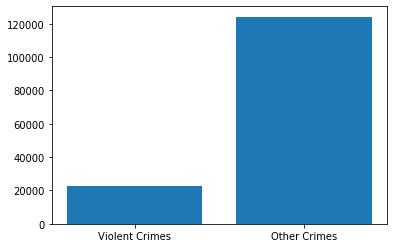

In [270]:
count = [violnt_crims_cnt,noviolnt_crims_cnt]
plt.bar([0,1],count)
plt.xticks([0,1],['Violent Crimes','Other Crimes'])
plt.show()

In [271]:
year_crime = pd.DatetimeIndex((crimes[crimes.isviolent==1]).date_reported).year

In [201]:
yrwise_crime= pd.DataFrame(data=year_crime.values)

In [202]:
yrwise_crime.columns = ['year']

In [ ]:
yrwise_crime['violent'] = 

In [203]:
vlnt_crime_yearwise = yrwise_crime['year'].value_counts()

In [225]:
vlnt_crime_yearwise = vlnt_crime_yearwise.sort_index(ascending=True)

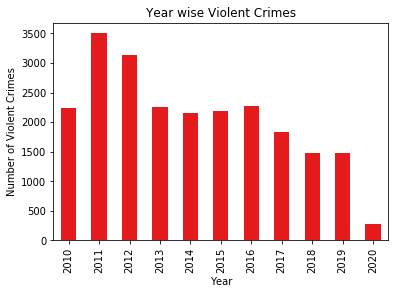

In [226]:
bar_chart = vlnt_crime_yearwise.plot(kind='bar',colormap='Set1')
bar_chart.set_ylabel('Number of Violent Crimes')
bar_chart.set_xlabel('Year')
bar_chart.set_title('Year wise Violent Crimes')
plt.show()

In [267]:
def prperty(offense):
    property_crimes_list = ['burglary','theft']
    if any(s in offense.lower() for s in property_crimes_list):
        pro = 1
    else:
        pro = 0
    return pro

In [282]:
crimes['ispropcrime'] = [prperty(off) for off in crimes.offense]
crimes['isothercrime'] = np.where((crimes.isviolent == 0) & (crimes.ispropcrime == 0) ,1,0)

In [285]:
crimes =  crimes.drop(['violent'],axis=1)

In [286]:
crimes

incident_no           date_reported               date_from  \
0        129036747  12/18/2012 10:30:00 PM  12/18/2012 10:24:00 PM   
1        149026722  10/20/2014 11:09:00 AM  10/19/2014 10:00:00 PM   
2        179011319  04/03/2017 08:50:00 PM  04/03/2017 05:00:00 PM   
3        139026892  09/29/2013 10:46:00 PM  09/29/2013 08:00:00 PM   
4        139014514  06/07/2013 08:33:00 PM  06/07/2013 08:20:00 PM   
...            ...                     ...                     ...   
147093   149028275  11/04/2014 06:10:00 PM  11/04/2014 05:40:00 PM   
147094   189017619  06/30/2018 08:55:00 PM  06/30/2018 07:55:00 PM   
147095    31110066  11/17/2011 08:51:00 PM  11/17/2011 08:40:00 PM   
147096    11002934  07/11/2010 03:00:00 PM  07/09/2010 10:30:00 PM   
147097   159026963  09/30/2015 02:18:00 PM  09/30/2015 01:00:00 PM   

                       date_to                        offense  \
0       12/18/2012 10:25:00 PM             AGGRAVATED ROBBERY   
1       10/20/2014 10:30:00 AM                          THEFT   
2       04/03/2017 05:10:00 PM             AGGRAVATED ROBBERY   
3       09/29/2013 09:00:00 PM           MENACING BY STALKING   
4       06/07/2013 08:30:00 PM                        ASSAULT   
...                        ...                            ...   
147093  11/04/2014 05:40:00 PM             AGGRAVATED ROBBERY   
147094  06/30/2018 08:15:00 PM                        ASSAULT   
147095  11/17/2011 08:48:00 PM  CRIMINAL DAMAGING/ENDANGERING   
147096  07/09/2010 10:40:00 PM            AGGRAVATED MENACING   
147097  09/30/2015 01:20:00 PM                        ASSAULT   

                       location  dayofweek cpd_neighborhood sna_neighborhood  \
0                     47-STREET    TUESDAY     WALNUT HILLS     WALNUT HILLS   
1                48-PARKING LOT     SUNDAY     WALNUT HILLS     WALNUT HILLS   
2                48-PARKING LOT     MONDAY       MOUNT AIRY         MT. AIRY   
3         01-SINGLE FAMILY HOME     SUNDAY    COLLEGE  HILL     COLLEGE HILL   
4                     47-STREET     FRIDAY         EVANSTON         EVANSTON   
...                         ...        ...              ...              ...   
147093                47-STREET    TUESDAY   OVER-THE-RHINE   OVER-THE-RHINE   
147094              11-HOSPITAL   SATURDAY       CORRYVILLE       CORRYVILLE   
147095                47-STREET   THURSDAY  WEST PRICE HILL  WEST PRICE HILL   
147096          02-MULTI FAMILY     FRIDAY   OVER-THE-RHINE   OVER-THE-RHINE   
147097  03-RESIDENTIAL FACILITY  WEDNESDAY     WALNUT HILLS     WALNUT HILLS   

                                                 weapons  ... victim_gender  \
0                                           12 - HANDGUN  ...          MALE   
1                                              99 - NONE  ...        FEMALE   
2                                           12 - HANDGUN  ...          MALE   
3       40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...          MALE   
4                                              99 - NONE  ...        FEMALE   
...                                                  ...  ...           ...   
147093                                      12 - HANDGUN  ...          MALE   
147094  40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...        FEMALE   
147095                     11--FIREARM (TYPE NOT STATED)  ...        FEMALE   
147096   40--PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...          MALE   
147097  40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...          MALE   

        suspect_age  suspect_race suspect_gender  totalnumbervictims  \
0           UNKNOWN         BLACK           MALE                 1.0   
1             31-40         WHITE           MALE                 1.0   
2          UNDER 18         BLACK           MALE                 2.0   
3             26-30         BLACK         FEMALE                 2.0   
4             18-25         BLACK         FEMALE                 3.0   
...             ...           ...          

In [237]:
len(crimes.cpd_neighborhood.unique())

53

In [243]:
crimes.columns

Index(['incident_no', 'date_reported', 'date_from', 'date_to', 'offense',
       'location', 'dayofweek', 'cpd_neighborhood', 'sna_neighborhood',
       'weapons', 'date_of_clearance', 'hour_from', 'hour_to', 'address_x',
       'longitude_x', 'latitude_x', 'victim_age', 'victim_race',
       'victim_gender', 'suspect_age', 'suspect_race', 'suspect_gender',
       'totalnumbervictims', 'totalsuspects', 'zip', 'violent'],
      dtype='object')

In [252]:
cpd_rep_area = crimes.groupby('cpd_neighborhood')['longitude_x','latitude_x'].mean().reset_index()

Empty DataFrame
Columns: [incident_no, date_reported, date_from, date_to, offense, location, dayofweek, cpd_neighborhood, sna_neighborhood, weapons, date_of_clearance, hour_from, hour_to, address_x, longitude_x, latitude_x, victim_age, victim_race, victim_gender, suspect_age, suspect_race, suspect_gender, totalnumbervictims, totalsuspects, zip, isviolent, ispropcrime, isothercrime]
Index: []

[0 rows x 28 columns]

In [304]:
crimes.date_to = pd.to_datetime(crimes.date_to,errors='coerce')

In [321]:
crimes.date_to

0        2012-12-18 22:25:00
1        2014-10-20 10:30:00
2        2017-04-03 17:10:00
3        2013-09-29 21:00:00
4        2013-06-07 20:30:00
                 ...        
147093   2014-11-04 17:40:00
147094   2018-06-30 20:15:00
147095   2011-11-17 20:48:00
147096   2010-07-09 22:40:00
147097   2015-09-30 13:20:00
Name: date_to, Length: 147097, dtype: datetime64[ns]

In [323]:
crimes = crimes[crimes.date_to > datetime.strptime('2019 03 01','%Y %m %d')].reset_index()

In [327]:
crimes = crimes.drop(['index', 'incident_no','sna_neighborhood', 'weapons', 'date_of_clearance', 'hour_from',
       'hour_to', 'address_x','victim_age',
       'victim_race', 'victim_gender', 'suspect_age', 'suspect_race',
       'suspect_gender', 'totalnumbervictims', 'totalsuspects','location'],axis = 1)

In [333]:
crimes['date'] = crimes['date_to'].dt.date

In [347]:
crimes

date_reported               date_from             date_to  \
0      03/18/2020 02:43:00 AM  03/18/2020 02:30:00 AM 2020-03-18 02:42:00   
1      03/03/2019 08:14:00 PM  03/03/2019 03:00:00 PM 2019-03-03 20:00:00   
2      11/04/2019 04:06:00 PM  11/04/2019 11:00:00 AM 2019-11-04 12:00:00   
3      10/02/2019 03:35:00 PM  10/02/2019 03:15:00 PM 2019-10-02 15:21:00   
4      03/04/2020 08:35:00 AM  03/04/2020 08:15:00 AM 2020-03-04 08:30:00   
...                       ...                     ...                 ...   
15584  05/11/2019 12:44:00 AM  05/10/2019 11:30:00 PM 2019-05-11 00:06:00   
15585  03/17/2019 02:02:00 PM  03/17/2019 01:55:00 PM 2019-03-17 14:00:00   
15586  02/22/2020 03:12:00 PM  02/12/2020 09:00:00 AM 2020-02-20 09:00:00   
15587  03/21/2020 02:45:00 PM  03/21/2020 02:40:00 PM 2020-03-21 14:43:00   
15588  03/03/2020 06:00:00 PM  03/02/2020 05:00:00 PM 2020-03-02 17:30:00   

                                    offense  dayofweek  cpd_neighborhood  \
0                                     THEFT  WEDNESDAY  SOUTH  FAIRMOUNT   
1                                     THEFT     SUNDAY   WEST PRICE HILL   
2                                     THEFT     MONDAY      MADISONVILLE   
3                                     THEFT  WEDNESDAY   WEST PRICE HILL   
4                      TELEPHONE HARASSMENT  WEDNESDAY          FAIRVIEW   
...                                     ...        ...               ...   
15584                     FELONIOUS ASSAULT     FRIDAY     COLLEGE  HILL   
15585         CRIMINAL DAMAGING/ENDANGERING     SUNDAY    OVER-THE-RHINE   
15586  UNLAWFUL SEXUAL CONDUCT WITH A MINOR  WEDNESDAY          WESTWOOD   
15587                     DOMESTIC VIOLENCE   SATURDAY   EAST PRICE HILL   
15588                     DOMESTIC VIOLENCE     MONDAY   WEST PRICE HILL   

       longitude_x  latitude_x  isviolent  ispropcrime  isothercrime  \
0       -84.556801   39.120243          0            1             0   
1       -84.599549   39.123823          0            1             0   
2       -84.386171   39.161537          0            1             0   
3       -84.603468   39.123142          0            1             0   
4       -84.520542   39.122972          0            0             1   
...            ...         ...        ...          ...           ...   
15584   -84.558302   39.202556          0            0             1   
15585   -84.515052   39.116175          0            0             1   
15586   -84.600143   39.127249          0            0             1   
15587   -84.560033   39.117697          0            0             1   
15588   -84.593976   39.123028          0            0             1   

             date  
0      2020-03-18  
1      2019-03-03  
2      2019-11-04  
3      2019-10-02  
4      2020-03-04  
...           ...  
15584  2019-05-11  
15585  2019-03-17  
15586  2020-02-20  
15587  2020-03-21  
15588  2020-03-02  

[15589 rows x 12 columns]

In [360]:
weather = pd.read_csv('D:\python\Python_project\Datasets\weather_cinci.csv')

In [266]:
crimes_rep_area = crimes.groupby('cpd_neighborhood').agg()

cpd_neighborhood longitude_x latitude_x
0                     AVONDALE  -84.496897  39.143422
1                     BONDHILL  -84.468834  39.178519
2        C. B. D. / RIVERFRONT  -84.512148  39.103523
3                   CALIFORNIA  -84.425116  39.065053
4             CAMP  WASHINGTON  -84.536699  39.136771
5                     CARTHAGE  -84.481860  39.194415
6                      CLIFTON  -84.519339  39.148123
7   CLIFTON/UNIVERSITY HEIGHTS  -84.526525  39.132505
8                COLLEGE  HILL  -84.543273  39.200418
9          COLUMBIA / TUSCULUM  -84.431011  39.114478
10                  CORRYVILLE  -84.506715  39.131772
11                   EAST  END  -84.442703  39.112035
12              EAST  WESTWOOD  -84.566804  39.147818
13             EAST PRICE HILL  -84.566540  39.109423
14           EAST WALNUT HILLS  -84.478704  39.127552
15              ENGLISH  WOODS  -84.556633  39.142247
16                    EVANSTON  -84.471850  39.139536
17                    FAIRVIEW  -84.519724  39.125905
18              FAY APARTMENTS  -84.560267  39.156020
19                    HARTWELL  -84.473898  39.213505
20                   HYDE PARK  -84.444129  39.138661
21            KENNEDY  HEIGHTS  -84.412221  39.185553
22                     LINWOOD  -84.416344  39.121969
23           LOWER PRICE  HILL  -84.551810  39.106830
24                MADISONVILLE  -84.394047  39.159040
25                    MILLVALE  -84.552937  39.146127
26                MOUNT  ADAMS  -84.497502  39.109684
27               MOUNT  AUBURN  -84.507892  39.120661
28                  MOUNT AIRY  -84.569113  39.190102
29                MT.  LOOKOUT  -84.427105  39.129480
30             MT.  WASHINGTON  -84.386760  39.091731
31              NORTH AVONDALE  -84.487580  39.153004
32             NORTH FAIRMOUNT  -84.552430  39.134673
33                   NORTHSIDE  -84.543977  39.166252
34                O'BRYONVILLE  -84.462123  39.133173
35                      OAKLEY  -84.427172  39.153031
36              OVER-THE-RHINE  -84.516372  39.112994
37              PADDOCK  HILLS  -84.476699  39.162574
38                   PENDLETON  -84.507633  39.110438
39              PLEASANT RIDGE  -84.432720  39.178727
40                  QUEENSGATE  -84.528557  39.103660
41                   RIVERSIDE  -84.614517  39.085302
42                    ROSELAWN  -84.458879  39.197658
43            S.. CUMMINSVILLE  -84.550273  39.155201
44                SAYLER  PARK  -84.690482  39.112427
45                 SEDAMSVILLE  -84.571073  39.091665
46            SOUTH  FAIRMOUNT  -84.560700  39.128524
47        SPRING GROVE VILLAGE  -84.515716  39.172389
48                WALNUT HILLS  -84.489526  39.128166
49                   WEST  END  -84.526504  39.111931
50             WEST PRICE HILL  -84.586495  39.115885
51                    WESTWOOD  -84.593586  39.142114
52                WINTON HILLS  -84.512905  39.185437

In [257]:
crimes_rep_area = crimes.join(cpd_rep_area,on='cpd_neighborhood',how='inner')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [253]:
cpd_rep_area.columns = [['cpd_neighborhood','longitude_x','latitude_x']]

In [242]:
clusterer = KMeans(n_clusters=53,random_state=101).fit(cpd_rep_area[['longitude_x','latitude_x']])

In [380]:
for d in crimes.date:
    print(type(d))

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime

In [377]:
weather['date'] = weather['date'].apply( lambda d : datetime.strptime(d,'%Y-%m-%d'))

In [378]:
weather['date'] = weather['date'].dt.date

In [385]:
crimes = pd.merge(crimes,weather,left_on='date',right_on='date')

In [387]:
crimes.head()

date_reported               date_from             date_to  \
0  03/18/2020 02:43:00 AM  03/18/2020 02:30:00 AM 2020-03-18 02:42:00   
1  03/18/2020 07:15:00 PM  03/18/2020 06:30:00 PM 2020-03-18 19:00:00   
2  03/18/2020 12:56:00 AM  03/18/2020 12:20:00 AM 2020-03-18 00:30:00   
3  03/18/2020 06:53:00 PM  03/18/2020 06:50:00 PM 2020-03-18 18:52:00   
4  03/18/2020 02:22:00 PM  03/18/2020 02:15:00 PM 2020-03-18 14:22:00   

                                      offense  dayofweek  cpd_neighborhood  \
0                                       THEFT  WEDNESDAY  SOUTH  FAIRMOUNT   
1  VIOLATE PROTECTION ORDER/CONSENT AGREEMENT  WEDNESDAY         WEST  END   
2                           FELONIOUS ASSAULT  WEDNESDAY      WALNUT HILLS   
3                                     ASSAULT  WEDNESDAY      SAYLER  PARK   
4                                       THEFT  WEDNESDAY        CORRYVILLE   

   longitude_x  latitude_x  isviolent  ispropcrime  isothercrime        date  \
0   -84.556801   39.120243          0            1             0  2020-03-18   
1   -84.529862   39.107598          0            0             1  2020-03-18   
2   -84.490842   39.123605          0            0             1  2020-03-18   
3   -84.690670   39.110767          0            0             1  2020-03-18   
4   -84.507753   39.128826          0            1             0  2020-03-18   

   temperature  humidity  wind_speed  precipitation  
0         48.8      94.7         4.9            0.0  
1         48.8      94.7         4.9            0.0  
2         48.8      94.7         4.9            0.0  
3         48.8      94.7         4.9            0.0  
4         48.8      94.7         4.9            0.0

In [397]:
crime_stats = crimes.groupby('cpd_neighborhood')['isviolent','ispropcrime','isothercrime'].apply(lambda x : x.sum()).reset_index()

In [399]:
crime_stats.columns = ['cpd_neighborhood','sumviolent','sumpropcrime','sumothercrime']

In [417]:
X = pd.merge(crimes,crime_stats,on='cpd_neighborhood')

In [418]:
X.columns

Index(['date_reported', 'date_from', 'date_to', 'offense', 'dayofweek',
       'cpd_neighborhood', 'longitude_x', 'latitude_x', 'isviolent',
       'ispropcrime', 'isothercrime', 'date', 'temperature', 'humidity',
       'wind_speed', 'precipitation', 'sumviolent', 'sumpropcrime',
       'sumothercrime'],
      dtype='object')

In [420]:
X = X.drop(['date_reported', 'date_from', 'date_to','dayofweek',
       'cpd_neighborhood', 'longitude_x', 'latitude_x','ispropcrime', 'isothercrime', 'date'],axis=1)

In [421]:
y = X['isviolent']

In [422]:
X = X.drop(['offense'],axis=1)

In [435]:
X = X.drop(['isviolent'],axis=1)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [440]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [441]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8995082317725037


In [445]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('crimes.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.492441 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.492441 to fit



In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [451]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8890314304041051


In [453]:
rndfores=RandomForestClassifier(n_estimators=100)

rndfores.fit(X_train,y_train)

y_pred=rndfores.predict(X_test)

In [454]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9198203976908275
